# Exploration of South East Asia data

## Import data and librairies

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme(style='white')
asie_energy = pd.read_csv('../BDD/asie.csv', sep=';')
asie_gdp = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv', sep=',')
asie_gdp = asie_gdp[asie_gdp['Entity']== 'South and South-East Asia']
asie = pd.merge(asie_energy, asie_gdp, on=['Year'])
asia_pop = pd.read_csv('../BDD/population.csv', sep=';')
asia_pop= asia_pop[asia_pop['Entity'] =='Asia']
asie = pd.merge(asia_pop, asie, on=['Year'])
asie.head()

,Entity_x,Code_x,Year,"Total population (Gapminder, HYDE & UN)",Energy (Mtep),Entity_y,Code_y,GDP per capita,145446-annotations
0,Asia,NaN,1820,745255040,178.0,South and South-East Asia,NaN,929.00,NaN
1,Asia,NaN,1850,822641088,187.0,South and South-East Asia,NaN,929.00,NaN
2,Asia,NaN,1870,810647552,191.0,South and South-East Asia,NaN,850.35,NaN
3,Asia,NaN,1890,894237952,222.0,South and South-East Asia,NaN,951.00,NaN
4,Asia,NaN,1900,939401664,242.0,South and South-East Asia,NaN,994.42,NaN


## Data exploration

In [7]:
year=asie['Year']
pop = asie['Total population (Gapminder, HYDE & UN)']
energy = asie['Energy (Mtep)']
gdpc= asie['GDP per capita']
gdp = gdpc*pop

### Primary energy consumption

Text(0, 0.5, 'Energy, EJ')

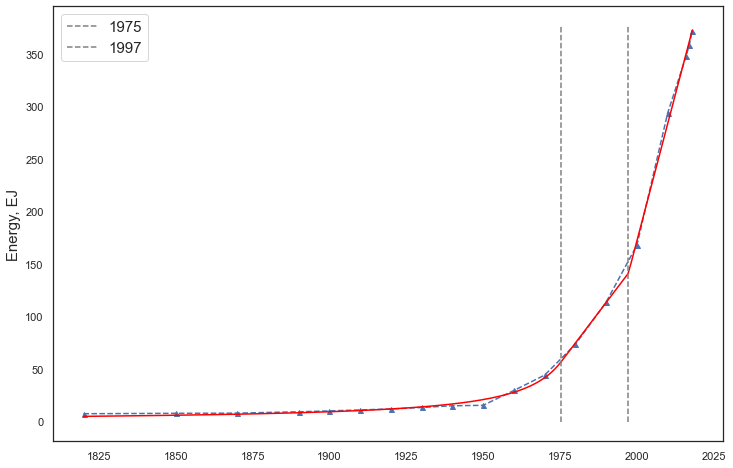

In [8]:
plt.figure(figsize=(12,8))
plt.plot(year, energy*4.186/10**2,  linestyle='dashed', marker='^', markersize=5)
yplot = np.linspace(year.min(), year.max(), 200)

b,c,d,f,x1,x2 = reg.hypLinLin(year, energy, p0=(0.2*100000, 1992, 110,275,  1980, 2000)) # Modele hyperbolique, lineaire, lin
plt.plot(yplot, reg.hyp_lin_lin(yplot, b,c,d,f,x1,x2)*4.186/10**2, color='red')
plt.plot([x1, x1], [0, 9000*4.186/10**2], label = str(int(x1)), linestyle='dashed', color='grey')
plt.plot([x2, x2], [0, 9000*4.186/10**2], label = str(int(x2)), linestyle='dashed', color='grey')
plt.legend(fontsize=15)
plt.ylabel('Energy, EJ', fontsize=15)

### Energy efficiency

(0.150284526629376, 0.369, 9.999725341796875, 0.3553008058107437, 0.3052675802513069, 0.02691696682234886)


Text(0, 0.5, 'Energy (kTep)')

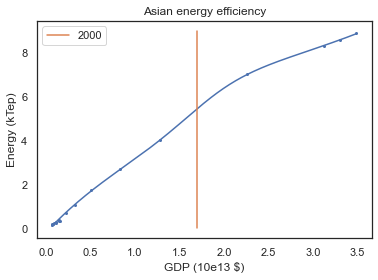

In [11]:
e = energy/10**3
g = gdp/10**13
gplot = np.linspace(g.min(), g.max(),200 )

G_i, E_i, A, alpha_1, alpha_2, alpha_3 = reg.sReg(g, e, Dy=None)
plt.plot(gplot, reg.s_model(gplot, G_i, E_i, A, alpha_1, alpha_2, alpha_3))
plt.scatter(g,e, s=4)
dist_infl = np.array([abs(g[i]-G_i) for i in range(len(g))])
infl_year = year[dist_infl.argmin()]
plt.plot([G_i, G_i], [0,9], label=str(infl_year))
plt.legend()

plt.title("Asian energy efficiency")
plt.xlabel('GDP (10e13 $)')
plt.ylabel('Energy (kTep)')



